## Notebook to test the data loading functions and the PD2dataset class

In [1]:
import torch
from torch.utils import data
import vae
from glob import glob
import numpy as np
import pandas as pd
from vae._globas import TRACE_PATH, \
                        META_PATH, \
                        LABEL_PATH, \
                        RQ_DF_PATH, \
                        EVENT_FILE_MAP_PATH, \
                        PARTITION_PATH, \
                        PD2_LABEL_COLUMNS
import pickle as pkl
import matplotlib.pyplot as plt

### Confirm that get_traces and get_labels loads the expected traces/labels

In [2]:
paths = sorted(glob(TRACE_PATH+'*'))
paths_labesl = sorted(glob(LABEL_PATH+'*'))

# load some traces and labels from a few dumps
traces1, ev1 = vae.io._utils._load_preprocessed_traces(paths[0])
traces2, ev2 = vae.io._utils._load_preprocessed_traces(paths[10])
labels1 = vae.io._utils._load_labels_dump(paths_labesl[0])
labels2 = vae.io._utils._load_labels_dump(paths_labesl[10])

# choose a random subset of the events and make a new array 
# of event numbers
evs = np.concatenate((ev1[10:44], ev2[60:69]))
tras = np.concatenate((traces1[10:44], traces2[60:69]))
labs = pd.concat((labels1[10:44], labels2[60:69]))


In [3]:
# Load the 'same' events from the subset
# above, but with get_traces, and get_labels
traces_loaded = vae.io.get_traces(evs)
labels_loaded = vae.io.get_labels(evs)

In [4]:
# check that traces loaded via both functions
# are the same

if np.all(traces_loaded == tras):
    print('Yay, it worked')
else:
    print('Nope')

Yay, it worked


In [5]:
# check that the labels are all equal. Note, we have
# to use np.allclose because of the NaNs in some of 
# the labels. because nan != nan

if np.allclose(labels_loaded.values.astype(float), 
            labs.values, equal_nan=True):
    print('The labels are all equal!')
else:
    print('nooooooooo')

The labels are all equal!


# Lets test the dataloader

Get the overall scalefactor

In [6]:
scale_factor = vae.utils.get_scale_factor(META_PATH)

Load partitioned dataset

In [7]:
partition = vae.io.load_partition(PARTITION_PATH, 'good_triggers')

In [10]:
DATA = vae.PD2dataset(partition['train'], 'ofenergy_constrain_full_PDS1Z1', scaledata=scale_factor)
len(DATA)
x, y = DATA.__getitem__(np.arange(20, 30))

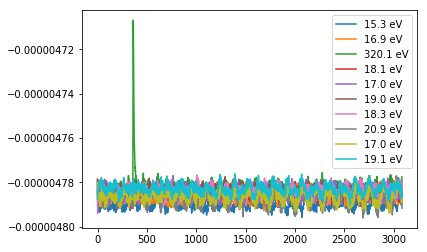

In [12]:
for ii, trace in enumerate(x[:,0]):
    plt.plot(trace, label = f'{y[ii]:.1f} eV')
plt.legend()
